In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 101)
pd.set_option('display.max_colwidth', 100)

In [181]:
# The information dataset for the training set is already loaded below
data = pd.read_csv('train.csv')
data.head()
print(len(data))
Xe=data.drop(columns=['id','rainfall'])

2190


**EXPLORATION**

In [88]:
# prompt: code pour vérifier le nombre de NaN par colonne dans une dataframe

print(data.isnull().sum())


id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [90]:
from scipy import stats
z_scores=np.abs(stats.zscore(Xe))
print(len(Xe[(z_scores>3).any(axis=1)]))
print(len(Xe))

80
2190


((array([-3.417104  , -3.16774281, -3.02952782, ...,  3.02952782,
          3.16774281,  3.417104  ]),
  array([  2.,   7.,  11., ..., 100., 100., 100.])),
 (16.523741480101574, 75.72191780821917, 0.9155690537835556))

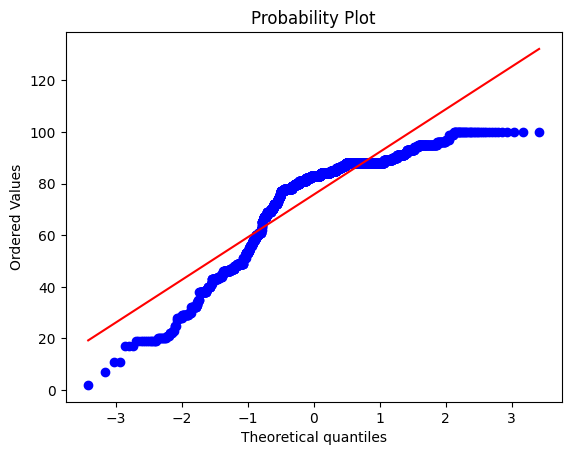

In [101]:
stats.probplot(Xe['cloud'], dist='norm',plot=plt)


(array([251., 167.,  99., 138., 194., 466., 619., 117.,  89.,  50.]),
 array([-2.01760856, -1.60784387, -1.19807919, -0.7883145 , -0.37854982,
         0.03121487,  0.44097956,  0.85074424,  1.26050893,  1.67027361,
         2.0800383 ]),
 <BarContainer object of 10 artists>)

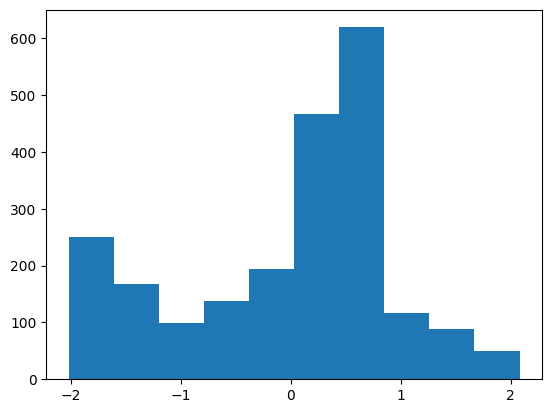

In [115]:
#plt.hist(Xe['cloud'], bins=10)
plt.hist(X_scaled, bins=10)

In [99]:
for c in Xe.columns:
  print("{} skewness : {}".format(c,Xe[c].skew()))


day skewness : 0.03061504429438121
pressure skewness : 0.28406229638059605
maxtemp skewness : -0.49089026324343005
temparature skewness : -0.5574710596213873
mintemp skewness : -0.6491785978493053
dewpoint skewness : -0.9978891683988873
humidity skewness : -0.561541093572786
cloud skewness : -1.339274466854246
sunshine skewness : 0.6398714088553171
winddirection skewness : 0.7080629783202128
windspeed skewness : 0.7693895995074559


In [103]:
from scipy.stats import boxcox
X_transformed, lambda_ = boxcox(Xe['cloud'] + 1)

In [116]:
from scipy.stats import skew
print(skew(X_scaled))

-0.46157394627806914


In [117]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed.reshape(-1, 1)).flatten()
X['cloud']=X_scaled

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=data.drop(columns=['id','rainfall'])
#X.fillna(X.mean(),inplace=True)
#X['cloud']=X_scaled
y=data['rainfall']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

**AUTO ML**

In [213]:
!pip install tpot

In [214]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20)
tpot.fit(X_train, y_train)

print("Best model:", tpot.fitted_pipeline_)

ImportError: cannot import name '_IS_PYPY' from 'sklearn.utils.fixes' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/fixes.py)

***RF WITH CV : ROC 0.86***

In [212]:
!pip install jedi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


In [215]:
!pip install scikit-learn==1.2.2 --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: scipy
    Found ex

In [209]:
!pip install XGBoost

In [196]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42) # Example: 5-fold cross-validation
#model = XGBClassifier() # Replace with your chosen model
model=RandomForestClassifier()
# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc') # Example scoring metric

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.90266927 0.91121276 0.875      0.8699095  0.89747328 0.80653859
 0.82249246 0.93816    0.89414414 0.93137969]
Mean cross-validation score: 0.8848979689853271


In [197]:
model.fit(X_train,y_train)
y_proba = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test, y_proba)
print("Test ROC AUC:", test_auc)


Test ROC AUC: 0.8614499091172519


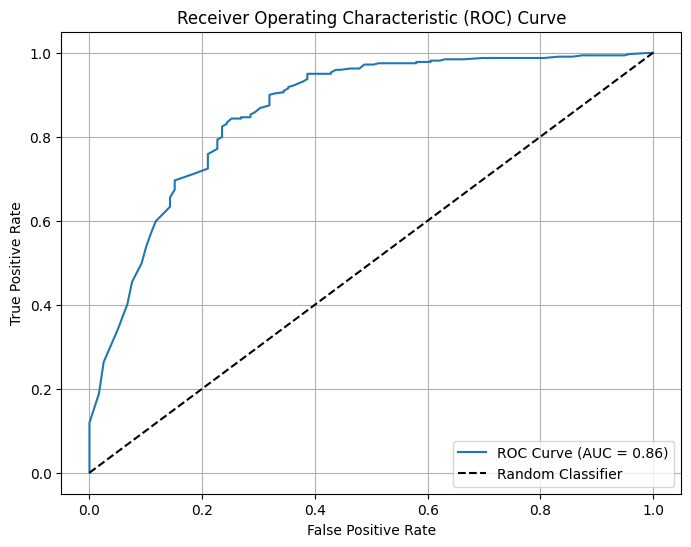

In [206]:
# prompt: plot roc auc curve measure by sklearn roc_auc_score metric, it was used as a scoring metric for a classifier that predicted probabilities

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming you have y_test and y_proba from the previous code
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [198]:
y_proba

array([0.82, 0.93, 0.52, 0.81, 0.88, 1.  , 0.98, 0.83, 0.74, 0.96, 0.99,
       0.72, 0.61, 0.01, 0.38, 0.72, 0.93, 0.69, 0.77, 0.15, 0.22, 0.9 ,
       0.18, 0.9 , 0.38, 0.92, 0.89, 0.68, 0.86, 0.98, 0.98, 0.93, 0.9 ,
       0.25, 0.09, 1.  , 0.96, 0.99, 0.75, 0.31, 0.87, 0.89, 0.95, 0.97,
       0.97, 0.96, 0.65, 0.94, 0.26, 0.89, 0.97, 0.14, 0.98, 0.99, 0.77,
       0.72, 0.96, 1.  , 0.98, 0.78, 0.44, 0.97, 0.8 , 0.92, 0.99, 0.88,
       0.73, 0.93, 0.92, 0.63, 0.78, 0.93, 0.89, 0.99, 0.27, 0.88, 0.54,
       0.87, 0.95, 0.32, 0.66, 0.97, 0.36, 0.97, 0.99, 0.97, 0.83, 0.38,
       0.97, 0.81, 0.92, 0.94, 0.34, 0.06, 0.9 , 0.84, 0.99, 0.9 , 0.12,
       1.  , 0.95, 0.41, 0.57, 0.95, 0.32, 0.79, 0.91, 0.95, 0.94, 1.  ,
       0.07, 0.91, 0.92, 0.55, 0.95, 0.97, 0.6 , 0.93, 0.94, 0.97, 0.9 ,
       0.97, 1.  , 0.59, 0.86, 0.95, 0.44, 0.97, 1.  , 0.93, 0.66, 0.61,
       0.93, 0.94, 1.  , 0.97, 0.97, 0.34, 0.57, 0.91, 0.22, 0.54, 0.98,
       0.81, 0.17, 0.92, 1.  , 0.98, 0.91, 0.95, 0.

**FIRST MODEL : LINEAR REGRESSION , ROC : 0.89 BUT WEIRD CAUSE WE DIDNT PREDICT PROBA**

In [138]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mae=mean_absolute_percentage_error(y_test,y_pred)
print(mae)

449966978592378.3


In [129]:
y_pred

array([ 0.54308284,  0.93756178,  0.24331065,  0.88571012,  0.33253471,
        0.91501925,  0.75455008,  0.89409859,  0.78071795,  0.32567767,
        0.87806337,  0.74243904,  0.59344053,  0.48573757,  1.02743412,
        0.85058575,  0.72102123,  1.03080129,  1.02520401,  0.90770517,
        0.88763996,  0.31521423,  0.36289809,  0.95367192,  0.57363571,
        0.33013839,  0.66822949,  0.9849315 ,  0.82618385,  0.82758318,
        0.71374337,  0.58786616,  0.95212708,  0.93585792,  0.15725949,
        0.30242245,  0.3998668 ,  0.84344792,  0.94778932,  1.08452811,
        0.99161084,  0.86214876,  0.90208703,  0.33720761,  0.88736366,
        1.08615277,  0.91736691,  0.9713266 ,  0.78891618,  1.02841838,
        0.24234393,  0.60293212,  1.07110995,  0.14872018,  0.48962466,
        0.95170259,  0.33103549,  0.69538573,  1.00930231,  1.03647888,
        0.83617214,  0.25355648,  0.93026194,  0.99872636,  0.86619624,
        0.27198182,  1.00262518,  1.01377788,  0.3472575 ,  0.90

In [120]:
y_pred = np.clip(y_pred, 0, 1)

In [ ]:
# prompt: code to transform all values of an array that are smaller than 0 to 0, and all values higher than 1 to 1

y_pred = np.clip(y_pred, 0, 1)


0.7852671394799056


In [ ]:
def transform_array(arr, threshold=0.5):
  """Transforms an array so that values are 0 or 1 based on proximity to 0 or 1.

  Args:
    arr: The input NumPy array.
    threshold: The threshold value to determine 0 or 1.

  Returns:
    A new NumPy array with values transformed to 0 or 1.
  """
  transformed_arr = np.where(arr < threshold, 0, 1)
  return transformed_arr

0.7680382497826717


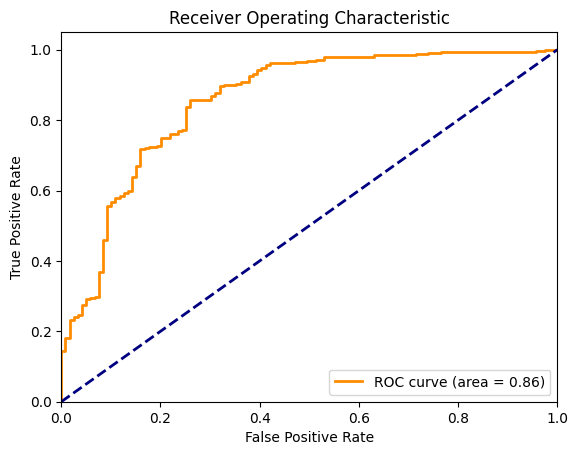

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(roc_auc)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       125
           1       0.90      0.93      0.91       423

    accuracy                           0.86       548
   macro avg       0.81      0.78      0.79       548
weighted avg       0.86      0.86      0.86       548



array([[<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'maxtemp'}>,
        <Axes: title={'center': 'temparature'}>,
        <Axes: title={'center': 'mintemp'}>,
        <Axes: title={'center': 'dewpoint'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'winddirection'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

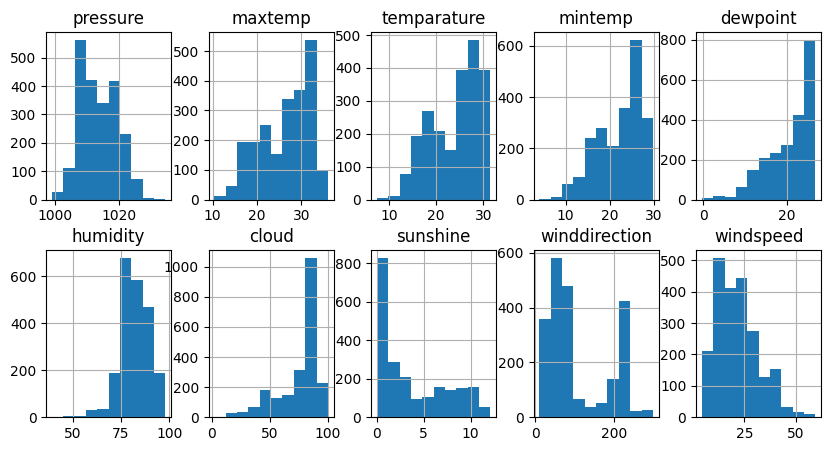

In [ ]:
data[['pressure','maxtemp', 	'temparature', 	'mintemp' ,	'dewpoint' ,	'humidity' ,	'cloud' ,	'sunshine' ,	'winddirection' ,	'windspeed']].hist(bins=10,figsize=(10,5), layout=(2,5))

**TEST AND KAGGLE SUBMISSION**

In [162]:
#reading test dataset
test = pd.read_csv('test.csv')
#test.fillna(test.mean(),inplace=True)

In [202]:
#y_submission
#y_submission=model.predict(test.drop(columns=['id']))
y_submission=model.predict_proba(test.drop(columns=['id']))[:, 1]
#y_submission = np.clip(y_submission, 0, 1)
y_submission
submission_df= pd.DataFrame()
submission_df['id']=test[['id']]
submission_df['rainfall']=y_submission
submission_df

,id,rainfall
0,2190,1.00
1,2191,1.00
2,2192,0.85
3,2193,0.11
4,2194,0.03
...,...,...
725,2915,0.97
726,2916,0.84
727,2917,0.99
728,2918,0.99


In [203]:
y_submission

array([1.  , 1.  , 0.85, 0.11, 0.03, 0.88, 0.9 , 1.  , 0.93, 0.93, 1.  ,
       0.01, 0.99, 0.97, 0.26, 0.  , 0.81, 0.8 , 0.01, 0.01, 0.03, 0.08,
       0.77, 0.99, 0.87, 0.36, 0.08, 1.  , 0.94, 0.42, 1.  , 0.98, 0.88,
       0.99, 0.75, 0.97, 0.2 , 0.96, 0.93, 0.83, 0.79, 0.92, 0.04, 0.96,
       0.98, 0.11, 0.15, 1.  , 0.09, 0.95, 0.89, 1.  , 0.99, 0.96, 0.99,
       1.  , 0.96, 0.95, 0.95, 0.99, 0.84, 1.  , 0.96, 0.97, 0.14, 0.29,
       0.06, 0.89, 0.9 , 0.19, 1.  , 0.99, 0.94, 0.92, 0.97, 0.95, 0.97,
       0.96, 0.36, 1.  , 0.95, 1.  , 0.29, 0.84, 0.99, 0.96, 0.97, 0.81,
       0.97, 0.99, 0.94, 0.98, 0.94, 0.92, 0.97, 0.95, 0.94, 0.91, 0.91,
       0.7 , 1.  , 0.83, 0.67, 0.94, 0.96, 0.93, 1.  , 0.99, 0.99, 0.96,
       0.99, 0.82, 0.91, 0.99, 1.  , 0.95, 1.  , 0.98, 0.98, 1.  , 0.61,
       0.89, 0.94, 0.28, 0.97, 0.74, 1.  , 0.97, 0.96, 1.  , 0.99, 0.99,
       0.73, 0.98, 0.92, 0.94, 1.  , 0.96, 0.99, 0.97, 0.97, 0.63, 0.13,
       0.94, 0.99, 0.94, 1.  , 0.15, 0.96, 0.74, 0.

In [204]:
#Submission
submission_df.to_csv('submission.csv', index=False)

In [205]:
!kaggle competitions submit -c playground-series-s5e3 -f submission.csv -m "RF"

100% 7.04k/7.04k [00:01<00:00, 5.02kB/s]
Successfully submitted to Binary Prediction with a Rainfall Dataset

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [ ]:
data.describe()
#print(data.isna().sum())
from scipy import stats
z_scores=np.abs(stats.zscore(X))
print(len(X[(z_scores>6).any(axis=1)]))
print(len(X))
stats.probplot(data[data.diffuse_flows>5000]['diffuse_flows'], dist='norm',plot=plt)
plt.hist(data['diffuse_flows'], bins=10)
#plt.hist(X['diffuse_flows'], bins=10)